In [4]:

# from utils import fit_scaling_laws, plot_actual_vs_predicted

# from experiments.evals.task_configs import CORE_TASKS, convert_to_task_metrics

# ENTITY = "stanford-mercury"
# PROJECT = "marin"

# # define the list of smaller runs to use as "ladder" models
# # RUNS = [
# #     "tootsie-scaling-512-81c36c",
# #     "tootsie-scaling-768-d17a90",
# #     "tootsie-scaling-1024-f4e4be",
# #     "tootsie-scaling-1536-e2a6d8",
# #     "tootsie-scaling-2048-72c648",
# # ]

# RUNS = [
#     "scaling-law-suite-default-v2-512-4d173f",
#     "scaling-law-suite-default-v2-768-12373d",
#     "scaling-law-suite-default-v2-1024-77c98b",
#     "scaling-law-suite-default-v2-1536-18344d",
#     "scaling-law-suite-default-v2-2048-7845a1",

# ]

# DEFAULT_RUNS = [
#     "scaling-law-suite-default-512-9b1182",
#     "scaling-law-suite-default-768-0631eb",
#     "scaling-law-suite-default-1024-e6a4e5",
#     "scaling-law-suite-default-1536-51914a",
#     "scaling-law-suite-default-2048-14ef39",
# ]

# TOKEN_FILTERS = {
#     "scaling-law-suite-default-v2-512-4d173f": 5.0e10,  # 50B tokens
#     "scaling-law-suite-default-v2-768-12373d": 7.0e10,  # 70B tokens
#     "scaling-law-suite-default-v2-1024-77c98b": 1.0e11, # 100B tokens
#     "scaling-law-suite-default-v2-1536-18344d": 2.1e11, # 210B tokens
#     "scaling-law-suite-default-v2-2048-7845a1": 2.1e11, # 210B tokens
# }

# # the large run to predict the performance of
# PRED_RUN = "llama-8b-tootsie-0.001-19ad63"

# # define the eval task loss metric
# TASK_LOSS = "eval/paloma/c4_en/bpb"
# # TASK_LOSS = "internal_eval/mmlu/bpb"

# # do we want to take the last step of the run or average over all steps, or just use all steps?
# AGGREGATION = "all"#"filtered" #"all"

# TOKENS_COL = "throughput/total_tokens"
# PARAM_COL = "parameter_count"
# PARAM_COL_TO_USE = "computed_params"

# # accuracy we ultimately want to predict
# TASK_ACCURACY = "lm_eval/hellaswag_10shot/acc"

# ACCS = convert_to_task_metrics(CORE_TASKS, metric="acc")


In [1]:
import importlib

import utils
from utils import fit_accuracy_from_task_loss, fit_task_loss_from_ladder_models, plot_actual_vs_predicted, plot_fit

/Users/nikilravi/miniconda3/envs/crfm_new/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-31 23:14:47,554	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
ENTITY = "stanford-mercury"
PROJECT = "marin"

# define the list of smaller runs to use as "ladder" models
RUNS = [
    "tootsie-scaling-512-81c36c",
    "tootsie-scaling-768-d17a90",
    "tootsie-scaling-1024-f4e4be",
    "tootsie-scaling-1536-e2a6d8",
    "tootsie-scaling-2048-72c648",
]

# the large run to predict the performance of
PRED_RUN = "llama-8b-tootsie-0.001-19ad63"

# define the eval task loss metric
TASK_LOSS = "eval/paloma/c4_en/bpb"
# TASK_LOSS = "internal_eval/mmlu/bpb"

# do we want to take the last step of the run or average over all steps, or just use all steps?
AGGREGATION = "all"

TOKENS_COL = "throughput/total_tokens"
PARAM_COL = "parameter_count"
PARAM_COL_TO_USE = "computed_params"

# accuracy we ultimately want to predict
TASK_ACCURACY = "lm_eval/hellaswag_10shot/acc"

In [3]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

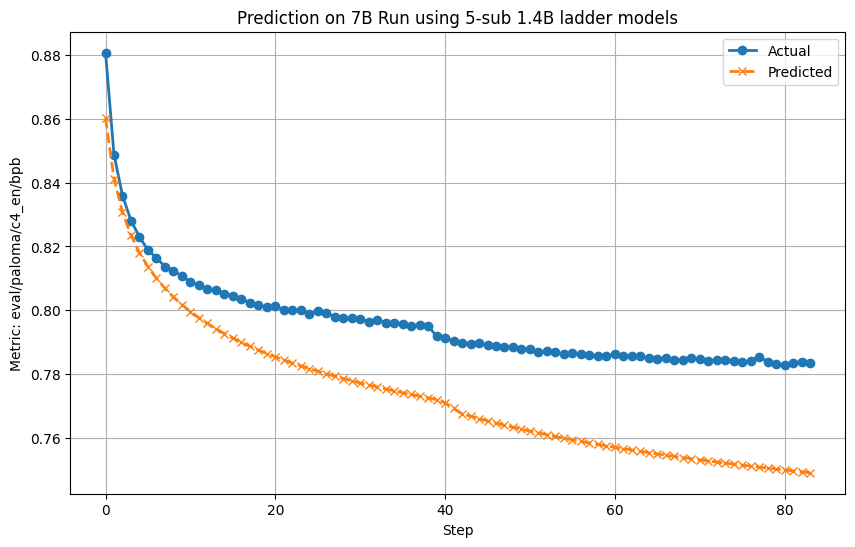

In [4]:
actual, predicted = fit_task_loss_from_ladder_models(
        runs=RUNS,
        entity=ENTITY,
        project=PROJECT,
        metrics=[TASK_LOSS, TOKENS_COL, TASK_ACCURACY],
        pred_run=PRED_RUN,
        task_loss=TASK_LOSS,
        aggregation=AGGREGATION,
        tokens_col=TOKENS_COL,
        param_col=PARAM_COL,
        param_col_to_use=PARAM_COL,
        use_log_for_ND=True,
        normalize_ND=True,
    )

plot_actual_vs_predicted(actual, predicted, title="Prediction on 7B Run using 5-sub 1.4B ladder models")

In [10]:
results = fit_scaling_laws(
    runs=DEFAULT_RUNS,
    loss_metrics=[TASK_LOSS],
    accuracy_metrics=None,
    entity=ENTITY,
    project=PROJECT,
    pred_run=PRED_RUN,
    use_log_for_ND=True,
    normalize_ND=True,
    count_embedding_params=False,
)


Going to print the filtered df
    eval/paloma/c4_en/bpb  throughput/total_tokens  \
0                3.764435             4.194304e+06   
1                1.070949             5.453015e+10   
2                1.059734             1.048618e+11   
3                1.055063             1.551934e+11   
4                1.053014             2.097152e+11   
5                3.752329             4.194304e+06   
6                1.018338             5.033584e+10   
7                1.003028             1.048618e+11   
8                0.998115             1.551934e+11   
9                0.994718             2.097152e+11   
10               3.761157             4.194304e+06   
11               0.986239             5.033584e+10   
12               0.970043             1.048618e+11   
13               0.964256             1.551934e+11   
14               0.959933             2.097152e+11   
15               3.779585             4.194304e+06   
16               0.948494             5.033584e+10 

In [11]:
results

({},
 ({'eval/paloma/c4_en/bpb': (array([0.88075703, 0.84879279, 0.83596116, 0.8281104 , 0.82302022,
           0.81882006, 0.81641668, 0.81367987, 0.81223959, 0.8107903 ,
           0.80884665, 0.80795377, 0.80673552, 0.80621433, 0.80519038,
           0.80455309, 0.80363607, 0.80237347, 0.80176669, 0.80091393,
           0.80123138, 0.80021042, 0.79994798, 0.79999822, 0.79894078,
           0.79975969, 0.7989825 , 0.7979725 , 0.79744339, 0.79764444,
           0.79725903, 0.7963618 , 0.79696178, 0.79613042, 0.79593462,
           0.79567122, 0.79516333, 0.79545355, 0.79514819, 0.79176152,
           0.79132468, 0.79041171, 0.78982705, 0.78952217, 0.7895807 ,
           0.78898627, 0.78872025, 0.78849959, 0.78850639, 0.78796756,
           0.78779185, 0.78690326, 0.78722352, 0.78678226, 0.7862345 ,
           0.78649789, 0.78638011, 0.7860859 , 0.78561205, 0.78554761,
           0.78619677, 0.78568959, 0.78554815, 0.78551286, 0.78490293,
           0.78483886, 0.78501928, 0.78438234, 

Relative Errors:
--------------------------------------------------
eval/paloma/c4_en/bpb: 2.52%
eval/paloma/c4_en/bpb
[0.88075703 0.84879279 0.83596116 0.8281104  0.82302022 0.81882006
 0.81641668 0.81367987 0.81223959 0.8107903  0.80884665 0.80795377
 0.80673552 0.80621433 0.80519038 0.80455309 0.80363607 0.80237347
 0.80176669 0.80091393 0.80123138 0.80021042 0.79994798 0.79999822
 0.79894078 0.79975969 0.7989825  0.7979725  0.79744339 0.79764444
 0.79725903 0.7963618  0.79696178 0.79613042 0.79593462 0.79567122
 0.79516333 0.79545355 0.79514819 0.79176152 0.79132468 0.79041171
 0.78982705 0.78952217 0.7895807  0.78898627 0.78872025 0.78849959
 0.78850639 0.78796756 0.78779185 0.78690326 0.78722352 0.78678226
 0.7862345  0.78649789 0.78638011 0.7860859  0.78561205 0.78554761
 0.78619677 0.78568959 0.78554815 0.78551286 0.78490293 0.78483886
 0.78501928 0.78438234 0.78446639 0.78501964 0.7845459  0.7840997
 0.78449345 0.78442794 0.78412217 0.78367698 0.78419703 0.78532344
 0.78386343

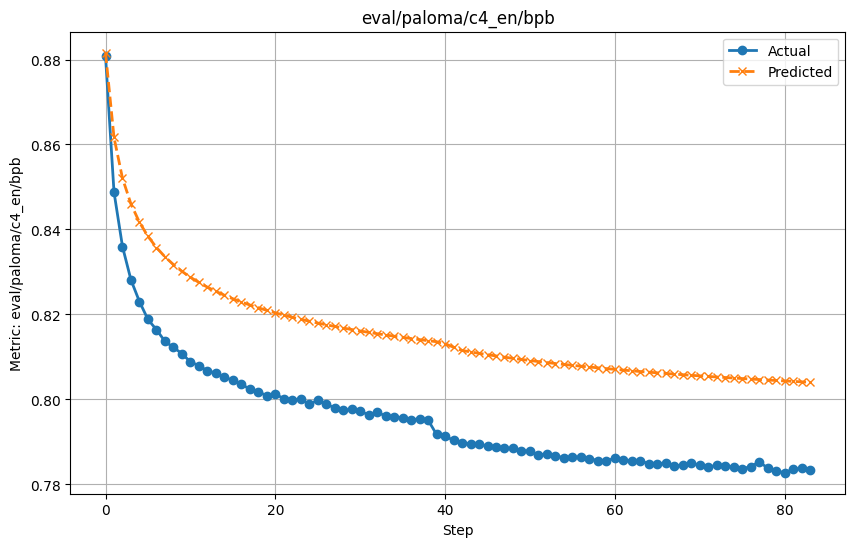

In [12]:
_, predictions = results
loss_results, accuracy_results, _, _, relative_errors = predictions

print("Relative Errors:")
print("-" * 50)
for metric, error in relative_errors.items():
    print(f"{metric}: {error:.2f}%")

for loss_metric, (actual, predicted) in loss_results.items():
    print(loss_metric)
    print(actual)
    print(predicted)

    plot_actual_vs_predicted(actual, predicted, loss_metric)
    break

In [13]:
for index, (acc_metric, (actual, predicted)) in enumerate(accuracy_results.items()):
    print(acc_metric)
    print(actual)
    print(predicted)

    # plot actual vs predicted
    if index == 9:
        plot_actual_vs_predicted(actual, predicted, acc_metric)
        break

